In [192]:
import numpy as np
import pandas as pd
uiks = pd.read_csv('data/cities_ok.csv', index_col=0)
uiks['total_voters'].sum()

12451827

In [193]:
len(uiks)

6602

In [194]:
uiks['total_voters'].sum()

12451827

In [195]:
uiks['total_voters'].sum()

12451827

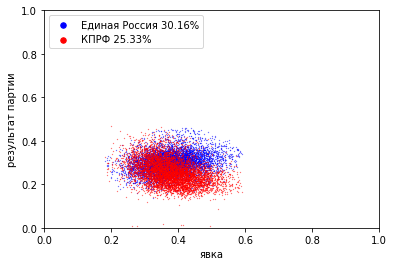

In [196]:
import matplotlib.pyplot as plt
uiks['er_percent'] = uiks['er'] / (uiks['voted'])
uiks['kprf_percent'] = uiks['kprf'] / (uiks['voted'])
er_string = str(round(100*uiks['er'].sum()/uiks['voted'].sum(),2)) + '%'
kprf_string = str(round(100*uiks['kprf'].sum()/uiks['voted'].sum(),2))+ '%'


uiks['turnout'] = uiks['voted']/uiks['total_voters']
plt.scatter(uiks['turnout'], uiks['er_percent'], color='blue', s=0.05, label="Единая Россия " + er_string)
plt.scatter(uiks['turnout'], uiks['kprf_percent'], color='red', s=0.05, label="КПРФ " + kprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("явка")
plt.ylabel("результат партии")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


In [197]:
cities = uiks['city300'].drop_duplicates()
city_result = pd.DataFrame()
i=0
for city in cities:
    i+=1
    city_data = uiks[uiks['city300'] == city]
    city_er_percent = round(100*city_data['er'].sum()/city_data['voted'].sum(),2)
    city_kprf_percent = round(100*city_data['kprf'].sum()/city_data['voted'].sum(),2)
    city_result = city_result.append(pd.DataFrame({'name':city,'er_percent': city_er_percent,'kprf_percent': city_kprf_percent}, index=[i]))
city_result.sort_values('er_percent')

,name,er_percent,kprf_percent
37,Хабаровск,22.59,26.29
25,Владивосток,24.43,35.47
12,Киров,24.86,17.35
42,Ярославль,25.39,25.34
20,Омск,26.42,35.63
43,Москва,26.47,27.43
22,Орёл,28.12,23.34
33,Тверь,28.43,25.50
16,Липецк,28.47,29.23
17,Мурманск,28.49,19.86


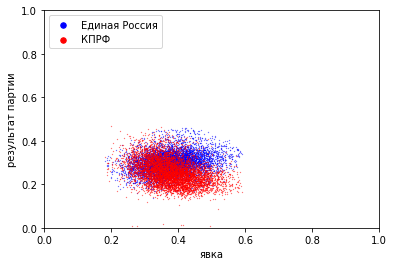

In [198]:
import matplotlib.pyplot as plt
uiks['er_percent'] = uiks['er'] / (uiks['voted'])
uiks['kprf_percent'] = uiks['kprf'] / (uiks['voted'])
uiks['turnout'] = uiks['voted']/uiks['total_voters']
plt.scatter(uiks['turnout'], uiks['er_percent'], color='blue', s=0.05, label="Единая Россия")
plt.scatter(uiks['turnout'], uiks['kprf_percent'], color='red', s=0.05, label="КПРФ")
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("явка")
plt.ylabel("результат партии")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

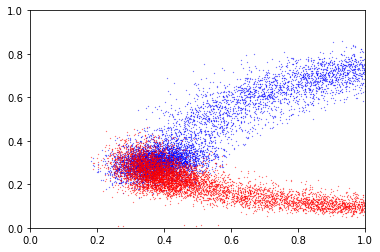

0.19222115544229743

In [199]:
from random import uniform
uiks = uiks.sample(frac=1)

uiks['er_fraud'] = uiks['er']
uiks['kprf_fraud'] = uiks['kprf']
uiks['voted_fraud'] = uiks['voted']
uiks['added'] = False

i = 0
er_percent = uiks['er_fraud'].sum()/uiks['voted_fraud'].sum()
for index, row in uiks.iterrows():
    if er_percent < 0.47:
        total_voters = row['total_voters']
        voted = row['voted']
        max_fraud = total_voters - voted
        min_fraud = max_fraud*0
        number = int(uniform(min_fraud, max_fraud))
        uiks.loc[index, 'er_fraud'] = row['er'] + number
        uiks.loc[index, 'voted_fraud'] = row['voted'] + number
        uiks.loc[index,'added'] = True
        er_percent = uiks['er_fraud'].sum()/uiks['voted_fraud'].sum()

uiks['turnout_fraud'] = uiks['voted_fraud']/uiks['total_voters']
uiks['er_percent_fraud'] = uiks['er_fraud']/uiks['voted_fraud']
uiks['kprf_percent_fraud'] = uiks['kprf']/uiks['voted_fraud']

plt.scatter(uiks['turnout_fraud'], uiks['er_percent_fraud'], color='blue', s=0.05)
plt.scatter(uiks['turnout_fraud'], uiks['kprf_percent_fraud'], color='red', s=0.05)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
uiks['kprf'].sum()/uiks['voted_fraud'].sum()

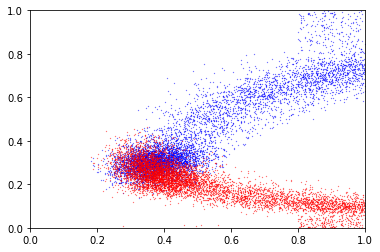

0.1815656158034349

In [200]:
uiks_change = uiks[~uiks['added']]
uiks['changed'] = False
for index, row in uiks_change.iterrows():
    if er_percent < 0.4982:
        total_voters = row['total_voters']
        random_voted = int(uniform(total_voters * 0.8, total_voters))
        voted = random_voted
        random_er = int(uniform(random_voted * 0.8, random_voted))
        uiks.loc[index, 'voted_fraud'] = voted
        uiks.loc[index, 'er_fraud'] = int(random_er)
        uiks.loc[index, 'kprf_fraud'] = int((random_voted - random_er)*0.3)
        uiks.loc[index, 'changed'] = True
        er_percent = uiks['er_fraud'].sum() / uiks['voted_fraud'].sum()

uiks['turnout_fraud'] = uiks['voted_fraud']/uiks['total_voters']
uiks['er_percent_fraud'] = uiks['er_fraud']/uiks['voted_fraud']
uiks['kprf_percent_fraud'] = uiks['kprf_fraud']/uiks['voted_fraud']

plt.scatter(uiks['turnout_fraud'], uiks['er_percent_fraud'], color='blue', s=0.05)
plt.scatter(uiks['turnout_fraud'], uiks['kprf_percent_fraud'], color='red', s=0.05)
plt.xlim([0,1])
plt.ylim([0,1])

plt.show()
uiks['kprf_fraud'].sum()/uiks['voted_fraud'].sum()

In [201]:
# uiks.to_csv('cities_fraud.csv')

In [202]:
uiks = pd.read_csv('data/cities_fraud.csv', index_col=0)

In [203]:
uiks['er_fraud'].sum()/uiks['voted_fraud'].sum()

0.49830296395988516

In [204]:
uiks['kprf_fraud'].sum()/uiks['voted_fraud'].sum()

0.18151230796901455

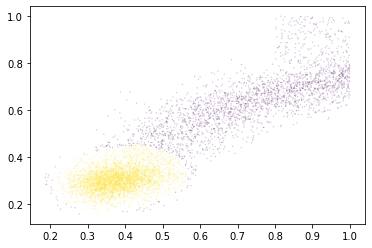

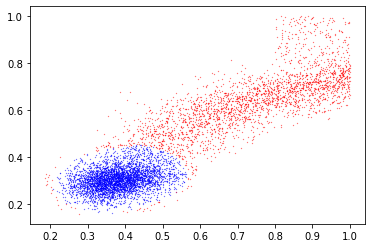

In [205]:
from sklearn.cluster import DBSCAN
er = uiks[['turnout_fraud', 'er_percent_fraud']]
er = er.to_numpy()
db = DBSCAN(eps=0.045, min_samples=200).fit(er)
plt.scatter(er[:, 0], er[:, 1], c=db.labels_, s=0.01)
plt.show()
uiks['db'] = db.labels_
uiks_normal = uiks[uiks['db'] == 0]
uiks_abnormal = uiks[uiks['db'] != 0]
plt.scatter(uiks_normal['turnout_fraud'], uiks_normal['er_percent_fraud'], color='blue', s=0.05)
plt.scatter(uiks_abnormal['turnout_fraud'], uiks_abnormal['er_percent_fraud'], color='red', s=0.05)
plt.show()

In [206]:
uiks_normal['er_fraud'].sum()/uiks_normal['voted_fraud'].sum()

0.3076639824175107

In [207]:
uiks_normal['kprf_fraud'].sum()/uiks_normal['voted_fraud'].sum()

0.25118288753762186

In [208]:
uiks_abnormal['er_fraud'].sum()/uiks_abnormal['voted_fraud'].sum()

0.6581177822648225

In [209]:
uiks_abnormal['kprf_fraud'].sum()/uiks_abnormal['voted_fraud'].sum()

0.12310667169844018

In [210]:
len(uiks)-len(uiks[uiks['added']])-len(uiks[uiks['changed']])

3768

In [211]:
len(uiks_normal)

4040

In [212]:
len(uiks_normal[uiks_normal['added']])

353

In [213]:
len(uiks_normal[uiks_normal['changed']])

0

In [214]:
len(uiks_abnormal[uiks_abnormal['added']])

2272

In [215]:
len(uiks_abnormal[uiks_abnormal['changed']])

209

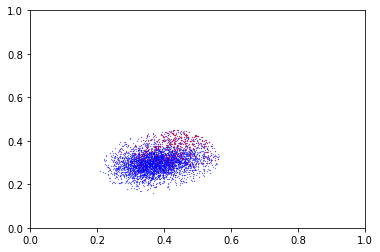

In [216]:
uiks_normal_fraud = uiks_normal[uiks_normal['added']]
plt.scatter(uiks_normal['turnout_fraud'], uiks_normal['er_percent_fraud'], color='blue', s=0.05)
plt.scatter(uiks_normal_fraud['turnout_fraud'], uiks_normal_fraud['er_percent_fraud'], color='red', s=0.05)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [217]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
pipe = Pipeline([("scale", StandardScaler()), ("model", KNeighborsRegressor(weights='distance'))])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(weights='distance'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(weights='distance'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'distance'}

In [218]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(estimator=pipe, param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,10,11,12,13,14,15,16,17,18,19,20]}, cv=3)
X = uiks_normal[['kprf_fraud', 'total_voters', 'lat', 'lon']]

y = uiks_normal['er_fraud']
Xx = uiks_abnormal[['kprf_fraud', 'total_voters', 'lat', 'lon']]

mod.fit(X, y)
prediction = mod.predict(Xx)
uiks_abnormal['er_predicted'] = prediction.round()
pd.DataFrame(mod.cv_results_)

/var/folders/pv/7q_wjlwn1n7db1pz94vrndqh0000gn/T/ipykernel_5420/925720237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uiks_abnormal['er_predicted'] = prediction.round()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003959,0.000037,0.004568,0.000263,1,{'model__n_neighbors': 1},0.339647,0.270394,0.294105,0.301382,0.028737,18
1,0.003838,0.000210,0.005420,0.000104,2,{'model__n_neighbors': 2},0.430695,0.428886,0.469048,0.442876,0.018521,17
2,0.003555,0.000069,0.005573,0.000158,3,{'model__n_neighbors': 3},0.457062,0.483367,0.522721,0.487717,0.026981,16
3,0.003106,0.000061,0.005356,0.000178,4,{'model__n_neighbors': 4},0.467641,0.512809,0.560084,0.513511,0.037743,15
4,0.003039,0.000064,0.005514,0.000074,5,{'model__n_neighbors': 5},0.475646,0.526062,0.571726,0.524478,0.039240,14
5,0.003116,0.000158,0.006204,0.000422,6,{'model__n_neighbors': 6},0.475315,0.545910,0.588031,0.536418,0.046503,13
6,0.003149,0.000094,0.006566,0.000420,7,{'model__n_neighbors': 7},0.476832,0.557015,0.595151,0.543000,0.049310,12
7,0.003538,0.000288,0.008295,0.000370,10,{'model__n_neighbors': 10},0.483990,0.575554,0.607908,0.555817,0.052479,11
8,0.003733,0.000143,0.009402,0.000180,11,{'model__n_neighbors': 11},0.485232,0.577123,0.610716,0.557690,0.053039,10
9,0.003708,0.000205,0.008706,0.000429,12,{'model__n_neighbors': 12},0.487443,0.580331,0.612841,0.560205,0.053135,9


In [219]:
# for index, row in uiks_abnormal.iterrows():
    # if row['er_fraud'] < row['er_predicted']:
        # uiks_abnormal.loc[index, 'er_predicted'] = row['er_fraud']

In [247]:
uiks_abnormal['voted_predicted'] = uiks_abnormal['voted_fraud'] - uiks_abnormal['er_fraud'] + uiks_abnormal['er_predicted']
uiks_abnormal['turnout_predicted'] = uiks_abnormal['voted_predicted'] / uiks_abnormal['total_voters']
uiks_abnormal['er_percent_predicted'] = uiks_abnormal['er_predicted'] / uiks_abnormal['voted_predicted']
uiks_abnormal['kprf_percent_predicted'] = uiks_abnormal['kprf'] / uiks_abnormal['voted_predicted']

uiks_normal['er_predicted'] = uiks_normal['er_fraud']
uiks_normal['voted_predicted'] = uiks_normal['voted_fraud']
uiks_normal['turnout_predicted'] = uiks_normal['turnout_fraud']
uiks_normal['er_percent_predicted'] = uiks_normal['er_percent_fraud']
uiks_normal['kprf_percent_predicted'] = uiks_normal['kprf_percent_fraud']

uiks_predicted = uiks_normal.append(uiks_abnormal)

/var/folders/pv/7q_wjlwn1n7db1pz94vrndqh0000gn/T/ipykernel_5420/2461143005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uiks_abnormal['voted_predicted'] = uiks_abnormal['voted_fraud'] - uiks_abnormal['er_fraud'] + uiks_abnormal['er_predicted']
/var/folders/pv/7q_wjlwn1n7db1pz94vrndqh0000gn/T/ipykernel_5420/2461143005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uiks_abnormal['turnout_predicted'] = uiks_abnormal['voted_predicted'] / uiks_abnormal['total_voters']
/var/folders/pv/7q_wjlwn1n7db1pz

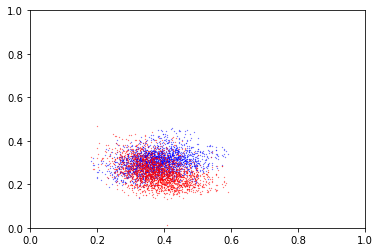

0.30358001564864634

In [221]:
uiks_added = uiks_abnormal[uiks_abnormal['added']]
plt.scatter(uiks_added['turnout'], uiks_added['er_percent'], color='blue', s=0.05)
plt.scatter(uiks_added['turnout'], uiks_added['kprf_percent'], color='red', s=0.05)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
uiks_added['er'].sum()/uiks_added['voted'].sum()

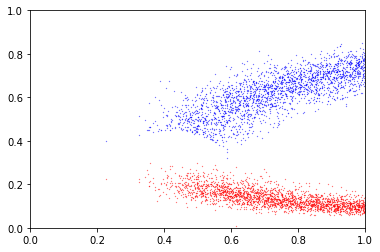

0.6361416286208621

In [222]:
plt.scatter(uiks_added['turnout_fraud'], uiks_added['er_percent_fraud'], color='blue', s=0.05)
plt.scatter(uiks_added['turnout_fraud'], uiks_added['kprf_percent_fraud'], color='red', s=0.05)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
uiks_added['er_fraud'].sum()/uiks_added['voted_fraud'].sum()

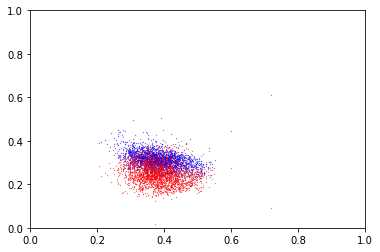

0.30816380748792316

In [223]:
plt.scatter(uiks_added['turnout_predicted'], uiks_added['er_percent_predicted'], color='blue', s=0.05)
plt.scatter(uiks_added['turnout_predicted'], uiks_added['kprf_percent_predicted'], color='red', s=0.05)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()
uiks_added['er_predicted'].sum()/uiks_added['voted_predicted'].sum()

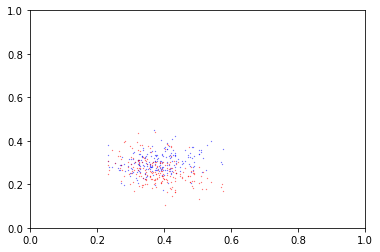

0.30262919779736824

In [224]:
uiks_changed = uiks_abnormal[uiks_abnormal['changed']]
plt.scatter(uiks_changed['turnout'], uiks_changed['er_percent'], color='blue', s=0.05)
plt.scatter(uiks_changed['turnout'], uiks_changed['kprf_percent'], color='red', s=0.05)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
uiks_changed['er'].sum()/uiks_changed['voted'].sum()

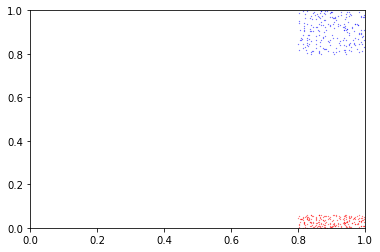

0.9011883632996374

In [225]:
plt.scatter(uiks_changed['turnout_fraud'], uiks_changed['er_percent_fraud'], color='blue', s=0.05)
plt.scatter(uiks_changed['turnout_fraud'], uiks_changed['kprf_percent_fraud'], color='red', s=0.05)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
uiks_changed['er_fraud'].sum()/uiks_changed['voted_fraud'].sum()


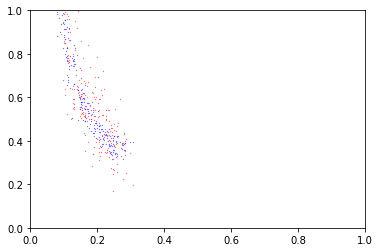

0.5074188052975765

In [226]:
plt.scatter(uiks_changed['turnout_predicted'], uiks_changed['er_percent_predicted'], color='blue', s=0.05)
plt.scatter(uiks_changed['turnout_predicted'], uiks_changed['kprf_percent_predicted'], color='red', s=0.05)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
uiks_changed['er_predicted'].sum()/uiks_changed['voted_predicted'].sum()

In [227]:
cities = uiks_predicted['city300'].drop_duplicates()
city_result_predicted = pd.DataFrame()
i=0
for city in cities:
    i+=1
    city_data = uiks_predicted[uiks_predicted['city300'] == city]
    city_er_percent = round(100*city_data['er'].sum()/city_data['voted'].sum(),2)
    city_er_percent_fraud = round(100*city_data['er_fraud'].sum()/city_data['voted_fraud'].sum(),2)
    city_er_percent_predicted = round(100*city_data['er_predicted'].sum()/city_data['voted_predicted'].sum(),2)
    er_error = city_er_percent_predicted - city_er_percent
    city_result_predicted = city_result_predicted.append(pd.DataFrame({'name':city,'er_percent_fraud': city_er_percent_fraud,'er_percent_predicted': city_er_percent_predicted, 'er_percent': city_er_percent,'er_error': er_error}, index=[i]))
city_result_predicted.sort_values('er_percent')

,name,er_percent_fraud,er_percent_predicted,er_percent,er_error
5,Хабаровск,40.33,24.10,22.59,1.51
18,Владивосток,48.85,27.46,24.43,3.03
10,Киров,41.44,26.31,24.86,1.45
17,Ярославль,50.26,27.87,25.39,2.48
32,Омск,48.10,27.78,26.42,1.36
11,Москва,46.39,27.49,26.47,1.02
27,Орёл,48.25,29.14,28.12,1.02
15,Тверь,45.31,29.39,28.43,0.96
28,Липецк,47.87,30.36,28.47,1.89
42,Мурманск,49.66,29.74,28.49,1.25


In [228]:
city_result_predicted['er_error'].max()

3.030000000000001

In [229]:
max_error_city = city_result_predicted[city_result_predicted['er_error']==city_result_predicted['er_error'].max()]
max_error_city

,name,er_percent_fraud,er_percent_predicted,er_percent,er_error
18,Владивосток,48.85,27.46,24.43,3.03


In [230]:
city_result_predicted['er_error'].min()



-0.9699999999999989

In [231]:
uiks_predicted['er'].sum()/uiks_predicted['voted'].sum()

0.3016037604981735

In [232]:
uiks_predicted['er_predicted'].sum()/uiks_predicted['voted_predicted'].sum()

0.31069974408621437

In [233]:
uiks_predicted['kprf'].sum()/uiks_predicted['voted'].sum()

0.25329542937653776

In [234]:
uiks_predicted['kprf'].sum()/uiks_predicted['voted_predicted'].sum()

0.2555629240509322

In [235]:
uiks_predicted['voted'].sum()

4736181

In [236]:
uiks_predicted['voted_predicted'].sum()

4694159.0

In [237]:
uiks_predicted['voted_fraud'].sum()

6449480

In [238]:
uiks_predicted['voted_fraud'].sum() - uiks_predicted['voted'].sum()
cities = uiks_added['city300'].drop_duplicates()
city_result_added = pd.DataFrame()
i=0
for city in cities:
    i+=1
    city_data = uiks_added[uiks_added['city300'] == city]
    city_er_percent = city_data['er'].sum()/city_data['voted'].sum()
    city_er_percent_fraud = city_data['er_fraud'].sum()/city_data['voted_fraud'].sum()
    city_er_percent_predicted = city_data['er_predicted'].sum()/city_data['voted_predicted'].sum()
    er_error = city_er_percent_predicted - city_er_percent

    city_kprf_percent = city_data['kprf'].sum()/city_data['voted'].sum()
    city_kprf_percent_fraud = city_data['kprf_fraud'].sum() / city_data['voted_fraud'].sum()
    city_kprf_percent_predicted = city_data['kprf'].sum() / city_data['voted_predicted'].sum()
    kprf_error = city_kprf_percent_predicted - city_kprf_percent

    city_result_added = city_result_added.append(pd.DataFrame({'name':city,'er_percent': city_er_percent,'er_percent_fraud': city_er_percent_fraud,'er_percent_predicted': city_er_percent_predicted,'er_error': er_error,'kprf_percent': city_kprf_percent,'kprf_percent_fraud': city_kprf_percent_fraud,'kprf_percent_predicted': city_kprf_percent_predicted, 'kprf_error': kprf_error}, index=[i]))
city_result_added = city_result_added.sort_values('er_percent')

In [239]:
# city_result_added['er_error'].max()

In [240]:
# city_result_added['kprf_error'].max()

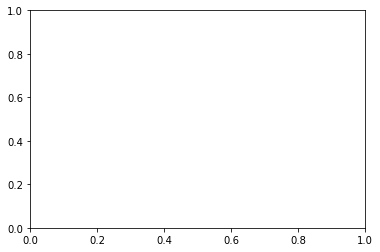

array([[1., 1.],
       [1., 1.]])

In [241]:
initial_cor = np.corrcoef(city_result_predicted['er_percent'], city_result_predicted['er_percent'])
plt.scatter(city_result_predicted['er_percent'], city_result_predicted['er_percent'], color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
initial_cor

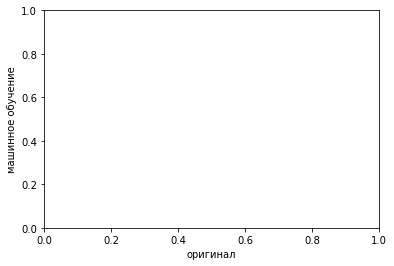

array([[1.        , 0.97350116],
       [0.97350116, 1.        ]])

In [242]:
prediction_cor = np.corrcoef(city_result_predicted['er_percent'], city_result_predicted['er_percent_predicted'])
plt.scatter(city_result_predicted['er_percent'], city_result_predicted['er_percent_predicted'], color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("оригинал")
plt.ylabel("машинное обучение")
plt.show()
prediction_cor

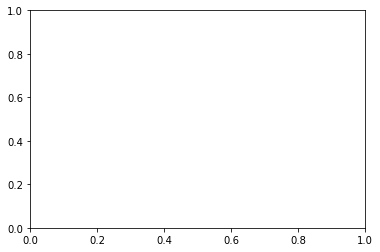

array([[1.        , 0.65600379],
       [0.65600379, 1.        ]])

In [243]:
prediction_cor
fraud_cor = np.corrcoef(city_result_predicted['er_percent'], city_result_predicted['er_percent_fraud'])
plt.scatter(city_result_predicted['er_percent'], city_result_predicted['er_percent_fraud'], color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
fraud_cor

In [244]:
cities = uiks_changed['city300'].drop_duplicates()
city_result_changed = pd.DataFrame()
i=0
for city in cities:
    i+=1
    city_data = uiks_changed[uiks_changed['city300'] == city]
    city_er_percent = city_data['er'].sum()/city_data['voted'].sum()
    city_er_percent_fraud = city_data['er_fraud'].sum()/city_data['voted_fraud'].sum()
    city_er_percent_predicted = city_data['er_predicted'].sum()/city_data['voted_predicted'].sum()
    print(city_er_percent_fraud)

    city_kprf_percent = city_data['kprf'].sum()/city_data['voted'].sum()
    city_kprf_percent_fraud = city_data['kprf_fraud'].sum() / city_data['voted_fraud'].sum()
    city_kprf_percent_predicted = city_data['kprf'].sum() / city_data['voted_predicted'].sum()
    print(city_kprf_percent)
    city_result_changed = city_result_changed.append(pd.DataFrame({'name':city,'er_percent': city_er_percent,'kprf_percent': city_kprf_percent,'er_percent_fraud': city_er_percent_fraud,'kprf_percent_fraud': city_kprf_percent_fraud,'er_percent_predicted': city_er_percent_predicted,'kprf_percent_predicted': city_kprf_percent_predicted}, index=[i]))
city_result_changed.sort_values('er_percent')

0.8938528860179203
0.2502479666732791
0.9256531246403499
0.21878224974200206
0.8910903504921939
0.38622848200312987
0.9300087489063867
0.402069475240207
0.9086375551435331
0.25050567916601835
0.9577464788732394
0.2857838364167478
0.8943113075849232
0.277228992944195
0.9327277191259514
0.257566765578635
0.8687244328746746
0.31008655126498
0.8817955112219451
0.24916843060175387
0.8934255295796291
0.208688906128782
0.9179395028451632
0.23497005988023953
0.8763796909492274
0.32653061224489793
0.9191521290564622
0.2476210615352083
0.9164064639824706
0.19264173703256937
0.9250599520383693
0.17308948399738733
0.8694880546075086
0.2788487645940809
0.8982787225217752
0.2249632892804699
0.8967436974789916
0.23428348301444749
0.8978889757623143
0.2363970588235294
0.9391824526420738
0.29510351626684195
0.9283598331418899
0.2257762521454205
0.882601532841487
0.32051009564293303
0.8930998732864878
0.2666043030869972
0.9081377338258072
0.26292384658143414
0.8585782466716906
0.15154073448712538
0.9428

,name,er_percent,kprf_percent,er_percent_fraud,kprf_percent_fraud,er_percent_predicted,kprf_percent_predicted
37,Иркутск,0.198276,0.396552,0.934275,0.019656,0.578740,0.724409
4,Владивосток,0.206948,0.402069,0.930009,0.020706,0.501040,1.130977
17,Хабаровск,0.214499,0.278849,0.869488,0.039044,0.418845,0.624316
40,Ярославль,0.247551,0.268255,0.927627,0.021523,0.566863,0.592429
30,Омск,0.257124,0.370444,0.860731,0.041585,0.424452,0.644752
3,Ульяновск,0.268701,0.386228,0.891090,0.032353,0.495937,0.716193
24,Москва,0.273464,0.266604,0.893100,0.031794,0.459837,0.497672
34,Мурманск,0.275330,0.221366,0.872772,0.037712,0.470690,0.346552
14,Тверь,0.276168,0.247621,0.919152,0.024011,0.567920,0.586967
13,Владимир,0.280612,0.326531,0.876380,0.036897,0.454039,0.534819


In [245]:

# initial_cor = np.corrcoef(city_result_changed['er_percent'], city_result_changed['er_percent'])
# plt.scatter(city_result_changed['er_percent'], city_result_changed['er_percent'], color='red')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.show()
# initial_cor
# prediction_cor = np.corrcoef(city_result_changed['er_percent'], city_result_changed['er_percent_predicted'])
# plt.scatter(city_result_changed['er_percent'], city_result_changed['er_percent_predicted'], color='red')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.show()
# prediction_cor
# fraud_cor = np.corrcoef(city_result_changed['er_percent'], city_result_changed['er_percent_fraud'])
# plt.scatter(city_result_changed['er_percent'], city_result_changed['er_percent_fraud'], color='red')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
#
# plt.show()
# prediction_cor



